In [26]:
import pandas as pd 
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, recall_score

1. Carga de datos:
* Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
* Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.



In [5]:
data_path_train='../ejercicios_core/data/data.csv'
df = pd.read_csv(data_path_train)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  pe

In [9]:
# Eliminamos la columna 'Unnamed: 32', que parece ser innecesaria
data = df.drop(columns=['Unnamed: 32'], errors='ignore')

# Eliminamos la columna 'id' si es que también está presente
data = data.drop(columns=['id'], errors='ignore')

# Convertimos la columna 'diagnosis' a valores binarios (0 = Benigno, 1 = Maligno)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

In [10]:
utils.estadisticas_descriptivas(data)

Estadisticas del dataset
        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.0528

El dataset de mamografías contiene 569 registros con 31 características numéricas que describen propiedades físicas, texturales y geométricas de las imágenes. La variable objetivo (diagnosis) muestra una distribución de 37.3% positivos (1) y 62.7% negativos (0). Las medidas promedio más destacadas incluyen radius_mean (14.13), texture_mean (19.29), y area_mean (654.89), con amplia variabilidad en casos extremos, especialmente en area_worst (rango de 4068.8). Características como concavity_mean y compactness_mean presentan valores bajos y distribuciones sesgadas hacia 0, lo que sugiere que son menos prominentes en los datos.

In [11]:
utils.identificar_valores_faltantes(data)

Valores faltantes en el dataset


,datos sin NAs en q,Na en q,Na en %
diagnosis,569,0,0.0
compactness_se,569,0,0.0
symmetry_worst,569,0,0.0
concave points_worst,569,0,0.0
concavity_worst,569,0,0.0
compactness_worst,569,0,0.0
smoothness_worst,569,0,0.0
area_worst,569,0,0.0
perimeter_worst,569,0,0.0
texture_worst,569,0,0.0


2. Exploración y preprocesamiento de datos:

* Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
* Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).



In [14]:
# Reemplazamos valores infinitos o NaN y eliminamos las filas con estos valores
data = data.replace([np.inf, -np.inf], np.nan).dropna()
print("Tamaño del dataset después de la limpieza:", data.shape)


Tamaño del dataset después de la limpieza: (569, 31)


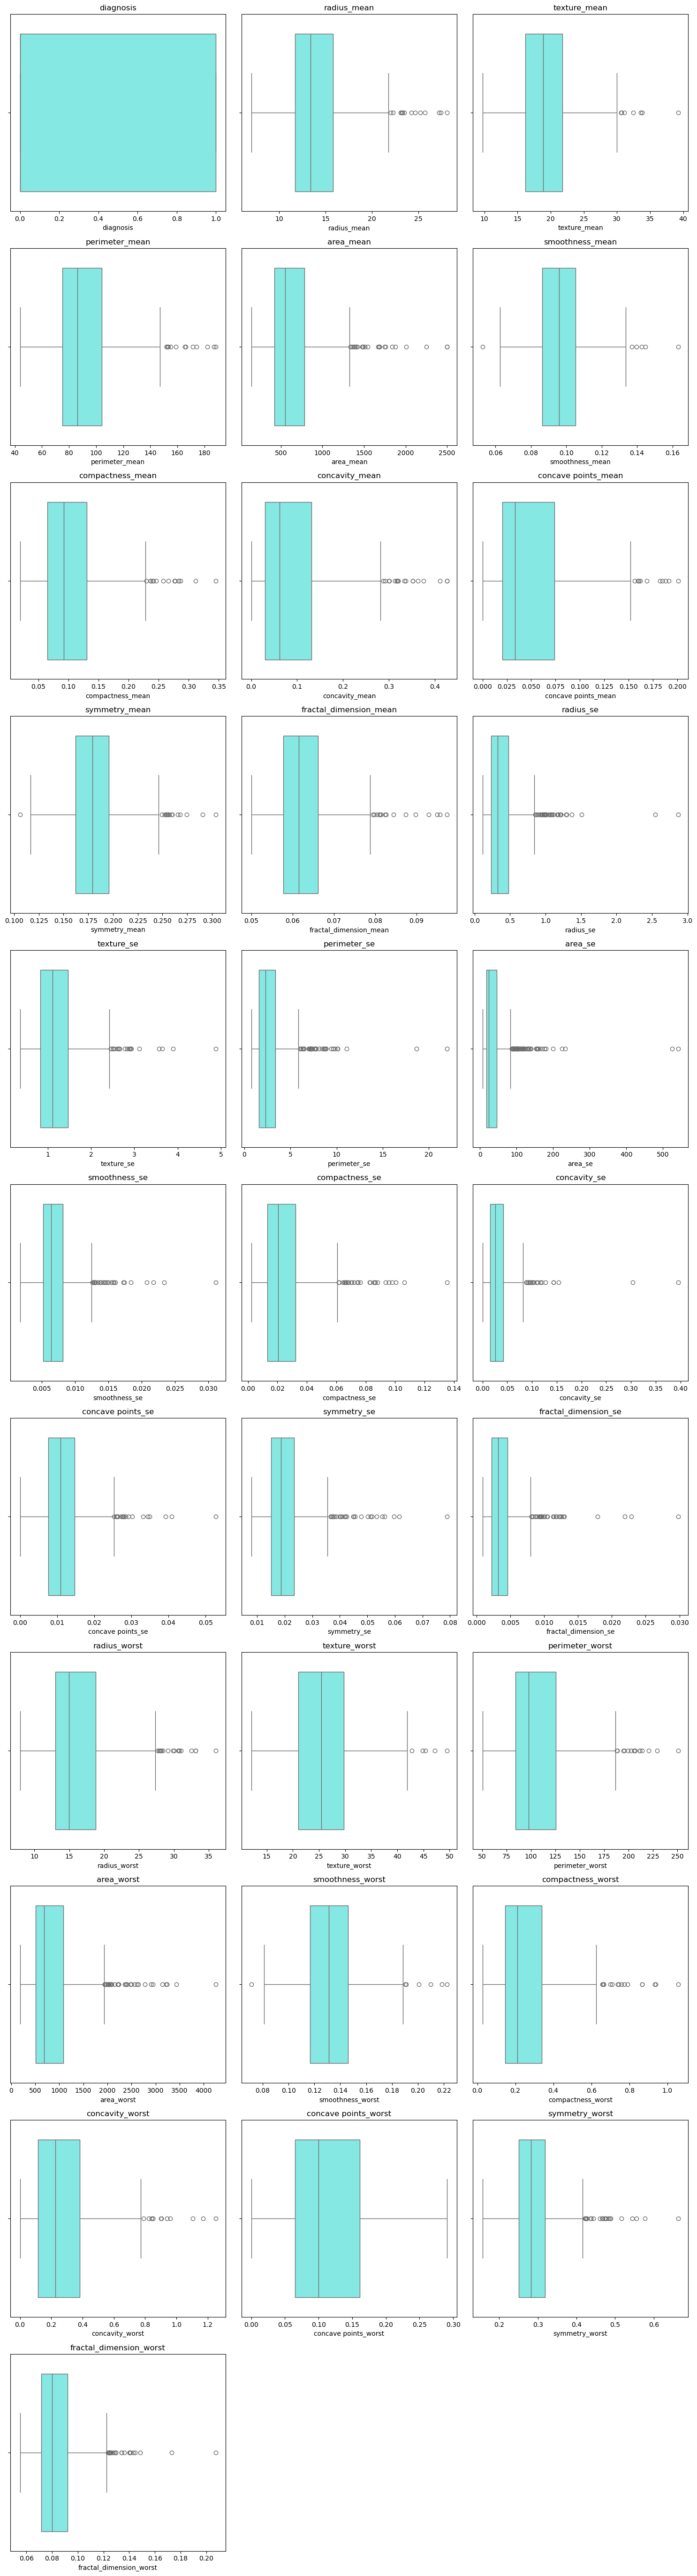

In [17]:
utils.plot_grafico_outliers(data,11,3,data)

Existen valores atipicos que no seran modificados debido a pueden tratarse de caracteristicas especiales por lo que se procede a escarlar los valores

2. Exploración y preprocesamiento de datos:
* Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
* Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).


In [20]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Aseguramos que 'y' tenga solo valores 0 o 1
y = y.astype(int)

# Normalización de las característica
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# División en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Restablecer los índices de las etiquetas
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

3. Implementación de la MLP:
* Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe tener una capa de entrada que coincida con el número de características del dataset, una capa oculta con al menos 32 neuronas y una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
* Utiliza la función de pérdida binaria (binary_crossentropy) y el optimizador Adam.


In [24]:
# Definimos el modelo de red neuronal MLP
model = Sequential()

# Capa de entrada utilizando Input
model.add(Input(shape=(X_train.shape[1],)))  # Usamos 'Input' para definir la forma de los datos de entrada

# Capa oculta
model.add(Dense(64, activation='relu'))

# Otra capa oculta
model.add(Dense(32, activation='relu'))

# Capa de salida (clasificación binaria)
model.add(Dense(1, activation='sigmoid'))

# Compilamos el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

4. Entrenamiento del modelo:
* Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
* Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.



In [25]:
# Entrenamiento del modelo con ajuste de pesos de clase
# Ajustamos el peso de la clase 1 (Maligno) para balancear las clases
class_weight = {0: 1., 1: 10.}  # Aumentamos el peso de la clase 'Maligno' (1)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weight)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7726 - loss: 2.8675 - val_accuracy: 0.8242 - val_loss: 0.4573
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8726 - loss: 1.3343 - val_accuracy: 0.8791 - val_loss: 0.3703
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8696 - loss: 0.8239 - val_accuracy: 0.8901 - val_loss: 0.2978
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9170 - loss: 0.5256 - val_accuracy: 0.8901 - val_loss: 0.2462
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9569 - loss: 0.4106 - val_accuracy: 0.9011 - val_loss: 0.2303
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9296 - loss: 0.3670 - val_accuracy: 0.9011 - val_loss: 0.2186
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9427 - loss: 0.2749 - val_accuracy: 0.9011 - val_loss: 0.2040
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9223 - loss: 0.2910 - val_accuracy: 0.9121 - v

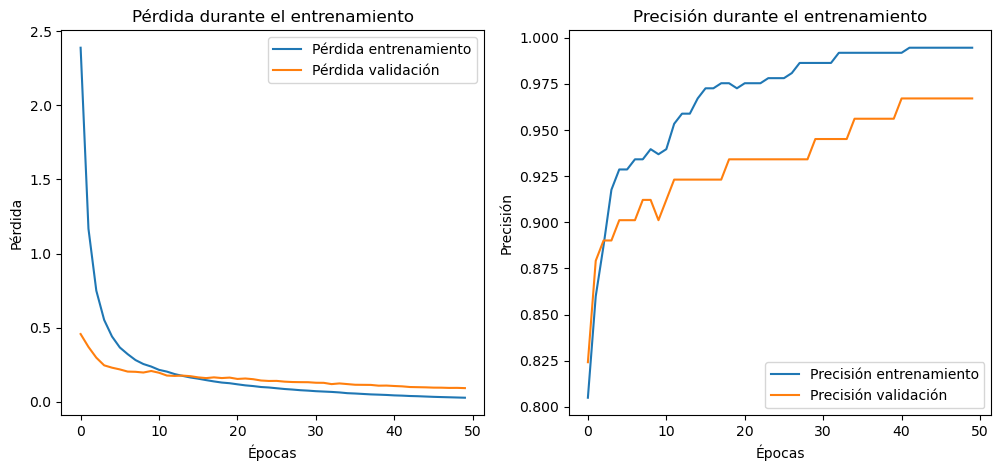

In [27]:
# Gráficas de pérdida y precisión
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

5. Evaluación del modelo:
* Evalúa el modelo en el conjunto de prueba utilizando métricas como la precisión, el recall, la F1-score y la matriz de confusión.
* Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.


In [28]:
#Evaluación del modelo
# Evaluamos el modelo en el conjunto de prueba
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)  # Aplicamos un umbral de 0.5 para la clasificación

# Reporte de clasificación
print(classification_report(y_test, y_pred, zero_division=1))
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

# Evaluamos el recall para ver el desempeño en la clase positiva
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Matriz de Confusión:
[[68  3]
 [ 2 41]]
Recall: 0.9534883720930233


De acuerdo al grafico del entrenamiento que muestra excelentes resultados tanto en la perdida como en la precision asi como tambien la matriz de confusion y el accuracy de 95% nos demuestra que una MLP simple es una buena opcion para este caso
 